In [9]:
import pandas as pd
df = pd.read_csv('../../data/final_df_points_18_21.csv')
df.head()

,bike_id,start_time,end_time,start_lat,start_lng,end_lat,end_lng,end_station_number,dt_start
0,93487,1609665090,1609665533,51.326737,12.358117,51.318782,12.368816,NaN,1609665090
1,72216,1609760482,1609761474,51.326737,12.358117,51.332276,12.373502,NaN,1609760482
2,41646,1609834321,1609836127,51.326737,12.358117,51.356609,12.369230,NaN,1609834321
3,93536,1609840180,1609840806,51.326737,12.358117,51.324809,12.336997,4051.0,1609840180
4,89054,1609937189,1609937765,51.326737,12.358117,51.330129,12.373510,NaN,1609937189


In [10]:
df = df.sort_values('dt_start').reset_index(drop=True)

In [11]:
df.tail()

,bike_id,start_time,end_time,start_lat,start_lng,end_lat,end_lng,end_station_number,dt_start
574893,71933,1640904867,1640905631,51.320938,12.373708,51.331796,12.405827,NaN,1640904867
574894,72257,1640904911,1640905492,51.339089,12.326971,51.330502,12.315658,NaN,1640904911
574895,93600,1640904922,1640906099,51.337080,12.332663,51.342862,12.395077,NaN,1640904922
574896,100236,1640905127,1640906811,51.332933,12.404402,51.305751,12.373562,NaN,1640905127
574897,72028,1640905163,1640906794,51.332844,12.404319,51.305720,12.373641,NaN,1640905163


In [12]:
import numpy as np

years = ['2018','2019','2020','2021']
months = ['1','2','3','4','5','6','7','8','9','10','11','12']
list = []
for year in years:
    for month in months:
        list.append(f'{year}-{month}')

tsdata = pd.DataFrame({ 'date': list, 'bike_count': 0})
tsdata = tsdata.set_index('date')
tsdata

,bike_count
date,
2018-1,0
2018-2,0
2018-3,0
2018-4,0
2018-5,0
2018-6,0
2018-7,0
2018-8,0
2018-9,0


In [13]:
from matplotlib import pyplot as plt
import statistics
from tqdm import tqdm
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')

def count(year):
    for ind in tqdm(df.index):
        #if df['time_start'][ind].year == year:
            i = f"{df['time_start'][ind].year}-{df['time_start'][ind].month}"
            #print(i)
            try:
                tsdata['bike_count'][i] += 1
            except KeyError:
                print(i)
    return tsdata

def plot(year,tsdata):
    fig, ax = plt.subplots(figsize=(50,10))
    # plotting monthly data
    ax.plot(tsdata)
    ax.set_xlabel('month')
    ax.set_ylabel('rentals')

    labels = ['2018','2019','2020','2021']

    #plt.xticks(tsdata.index, labels)

    # show values
    ax.set_title(f'Rentals from years 2018 - 2021')
    plt.show()


100%|██████████| 574898/574898 [00:57<00:00, 10062.26it/s]


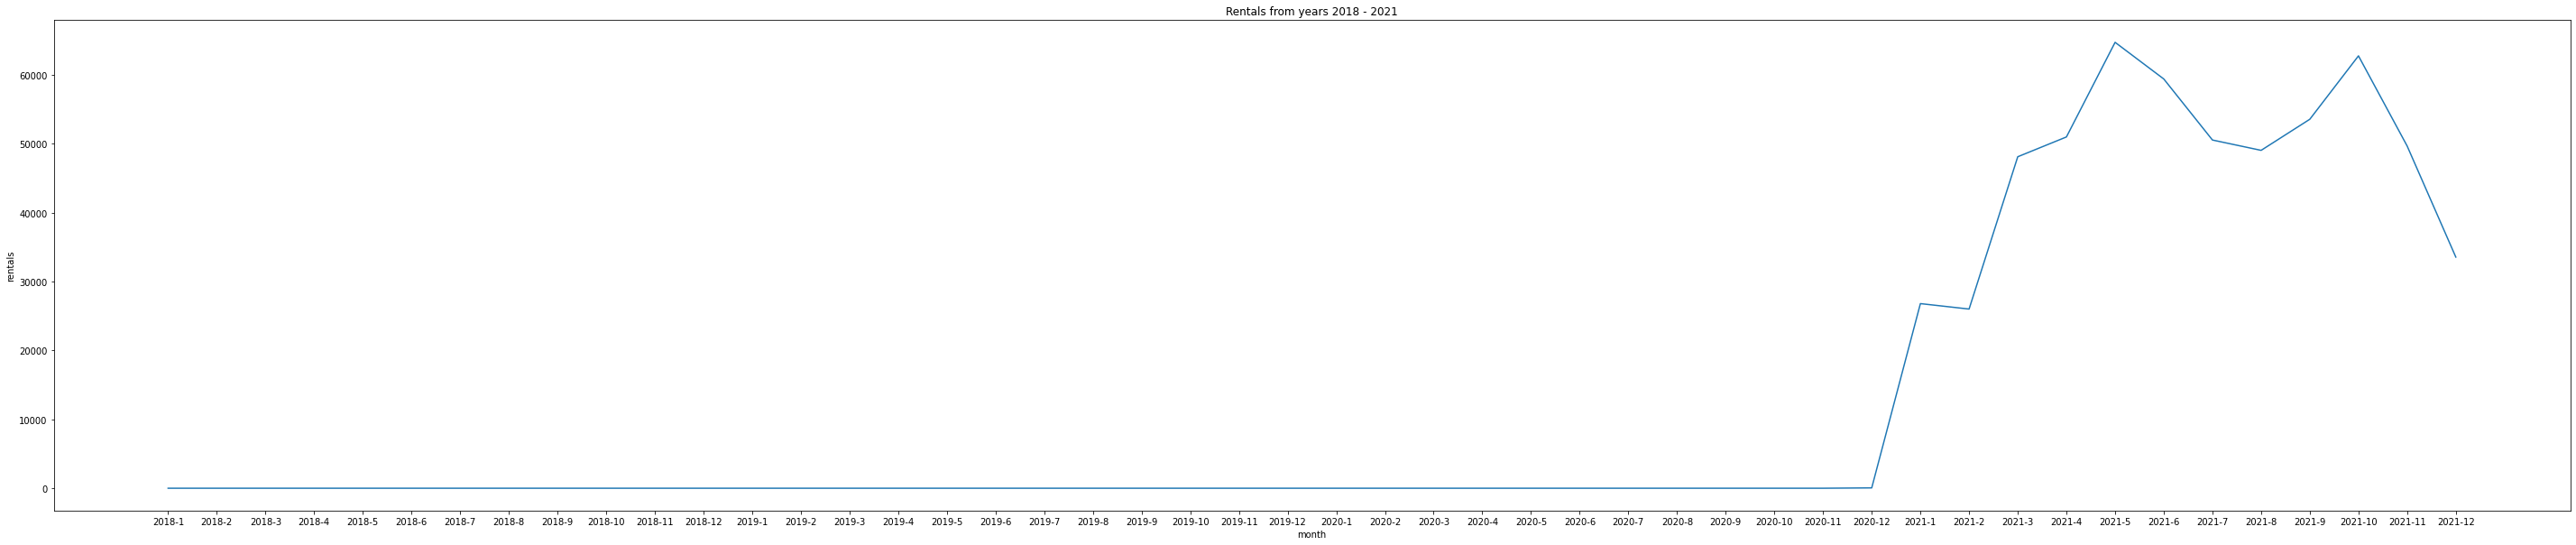

         bike_count
date               
2018-1            0
2018-2            0
2018-3            0
2018-4            0
2018-5            0
2018-6            0
2018-7            0
2018-8            0
2018-9            0
2018-10           0
2018-11           0
2018-12           0
2019-1            0
2019-2            0
2019-3            0
2019-4            0
2019-5            0
2019-6            0
2019-7            0
2019-8            0
2019-9            0
2019-10           0
2019-11           0
2019-12           0
2020-1            0
2020-2            0
2020-3            0
2020-4            0
2020-5            0
2020-6            0
2020-7            0
2020-8            0
2020-9            0
2020-10           0
2020-11           0
2020-12          51
2021-1        26784
2021-2        25994
2021-3        48088
2021-4        50960
2021-5        64688
2021-6        59372
2021-7        50516
2021-8        49017
2021-9        53526
2021-10       62724
2021-11       49648
2021-12       33530


In [14]:
for year in [True]:
    tsdata = count(year)
    plot(year,tsdata)
    print(tsdata)

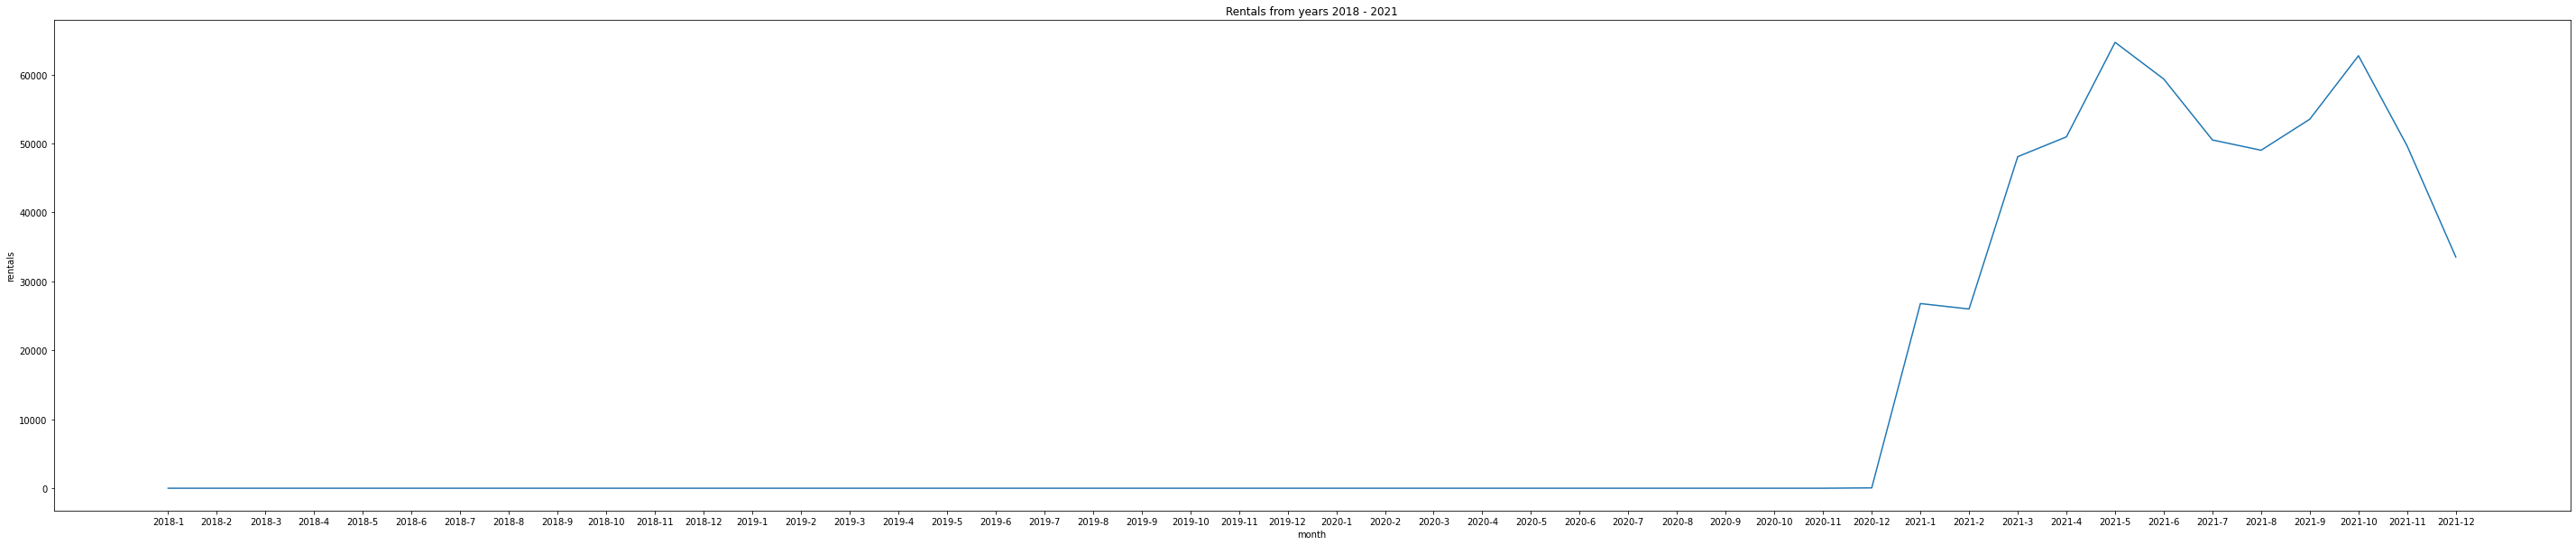

In [8]:
plot('1',tsdata)

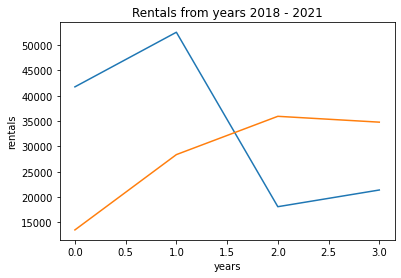

In [5]:
## TEST

from matplotlib import pyplot as plt

a = [41743,52523,18086,21382]
b = [13503,28369,35928,34774]

fig, ax = plt.subplots()
# plotting monthly data
ax.plot(a)
ax.plot(b)
ax.set_xlabel('years')
ax.set_ylabel('rentals')
labels = ['2018','2019','2020','2021']
#plt.xticks(tsdata.index, labels)
# show values
ax.set_title(f'Rentals from years 2018 - 2021')
plt.show()